Train: 1400 | Val: 200 | Test: 400
Validation MSE (10%): 24798696.000000
Test MSE (20%): 24822502.000000


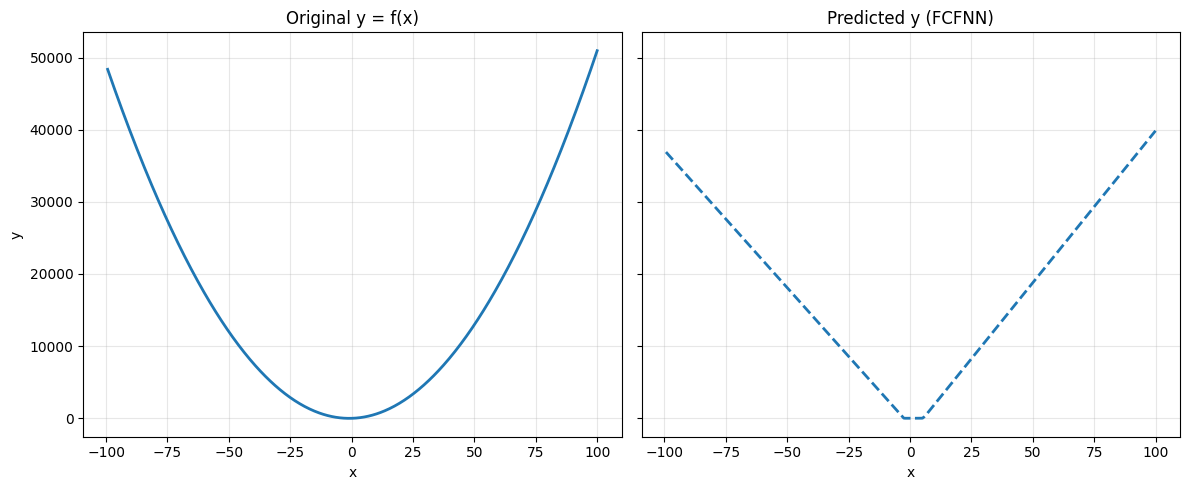

In [1]:
# Fully Connected Feedforward Neural Network (FCFNN) for f(x) = 5x^2 + 10x - 2
# Split: train = 70%, validation = 10%, test = 20%
# Plots ONE figure with TWO subplots: (left) Original y, (right) Predicted y

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


# ---- target function ----
def f(x):
    return 5*x**2 + 10*x - 2

# ---- data ----
def data_generate(n=1000, random_seed=42):
    np.random.seed(random_seed); tf.random.set_seed(random_seed)
    X = np.random.uniform(-100, 100, size=n).astype(np.float32).reshape(-1, 1)
    y = f(X).astype(np.float32)
    return X, y

# ---- model ----
def build_model():
    model = models.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)  # linear output
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

def main():
    # data
    X, y = data_generate(n=2000, random_seed=42)

    # ---- direct splits: 70% train, 10% val, 20% test ----
    # 1) take 70% train directly
    X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, train_size=0.70, random_state=42)
    # 2) split remaining 30% into 10% val and 20% test -> ratio 1:2  => test_size = 2/3
    X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=2/3, random_state=42)

    print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

    # train
    model = build_model()
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=200,
        batch_size=32,
        verbose=0
    )

    # evaluate
    val_mse = model.evaluate(X_val, y_val, verbose=0)
    test_mse = model.evaluate(X_test, y_test, verbose=0)
    print(f"Validation MSE (10%): {val_mse:.6f}")
    print(f"Test MSE (20%): {test_mse:.6f}")

    # grid for plotting
    xg = np.linspace(X.min(), X.max(), 600).astype(np.float32).reshape(-1, 1)
    y_true = f(xg)
    y_pred = model.predict(xg, verbose=0)

    # ONE figure, TWO subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

    axes[0].plot(xg, y_true, linewidth=2)
    axes[0].set_title("Original y = f(x)")
    axes[0].set_xlabel("x"); axes[0].set_ylabel("y"); axes[0].grid(alpha=0.3)

    axes[1].plot(xg, y_pred, "--", linewidth=2)
    axes[1].set_title("Predicted y (FCFNN)")
    axes[1].set_xlabel("x"); axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
